<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/preAIO25/warmup/exercise_w5/exercise_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **W5**

Download neccesary files from Github

In [21]:
import requests

In [22]:
def get_folder_url(username, repository, branch, folder_path):
  folder_raw_github_url = f"https://raw.githubusercontent.com/{username}/{repository}/{branch}/{folder_path}"
  print(folder_raw_github_url)
  return folder_raw_github_url

In [23]:
def get_raw_github_url(folder_raw_github_url, file_name):
  picture_raw_github_url = f"{folder_raw_github_url}/{file_name}"
  print(picture_raw_github_url)
  return picture_raw_github_url

In [24]:
def download_file(folder_raw_github_url, file_name):
  file_raw_github_url = get_raw_github_url(folder_raw_github_url, file_name)
  file_response = requests.get(file_raw_github_url)
  file_response.raise_for_status()  # Raise an exception for non-200 status codes
  #add handle error if cannot file file in url?

  with open(file_name, 'wb') as f:#create new file from binary respone
    f.write(file_response.content)
  return file_response

In [25]:
#Download neccessary files
# Replace with your actual values
username = "mylethidiem"
repository = "ProgramingTech"
branch = "main"
folder_path = "preAIO25/warmup/exercise_w5"

folder_raw_github_url = get_folder_url(username, repository, branch, folder_path)

list_file = ["background1.png", "background2.png", "nature.jpg", "object.png"]

for file_name in list_file:
  download_file(folder_raw_github_url, file_name)

https://raw.githubusercontent.com/mylethidiem/ProgramingTech/main/preAIO25/warmup/exercise_w5
https://raw.githubusercontent.com/mylethidiem/ProgramingTech/main/preAIO25/warmup/exercise_w5/background1.png
https://raw.githubusercontent.com/mylethidiem/ProgramingTech/main/preAIO25/warmup/exercise_w5/background2.png
https://raw.githubusercontent.com/mylethidiem/ProgramingTech/main/preAIO25/warmup/exercise_w5/nature.jpg
https://raw.githubusercontent.com/mylethidiem/ProgramingTech/main/preAIO25/warmup/exercise_w5/object.png


Quá trình xử lý gồm 3 bước:
1. Tính toán sự khác biệt compute difference: Tìm sự khác biệt giữa ảnh nền và đối tượng
2. Tạo mask nhị phân compute binary mask: Dựa kết quả khác biệt mà ta đã tính được và threshold để xác định pixel nào thuộc đối tượng, pixel nào thuộc nền
3. Thay thế nền replace background: Dựa vào mask nhị phân để xác định vị trí của đối tượng, thay thế phần nền bằng ảnh mới trong ảnh.

In [26]:
#import cv lib
!pip install numpy matplotlib opencv-python

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Bước 1: compute difference

In [28]:
def compute_difference(background, object):
  #img to float32
  background = np.float32(background)
  object = np.float32(object)
  print(f"background: {background}")
  print(f"object: {object}")
  # compute absolute difference between 2 pictures
  difference_three_channel = np.abs(background - object)
  print(f"difference_three_channel: {difference_three_channel}")

  # convert the difference to 1 channel by compute mean
  # sum of element along axis = 2(this mean the 3rd column of array 3 chanel)
  # 3 channel (row,col,ch)
  difference_single_channel = np.sum(difference_three_channel, axis=2) / 3
  print(f"difference_single_channel: {difference_single_channel}")

  # convert 2 uint8 to suitable for image processing
  difference_single_channel = difference_single_channel.astype(np.uint8)
  print(f"convert to uint8: {difference_single_channel}")
  return difference_single_channel

Step 2: Compute binary mask

In [29]:
def compute_binary_mask(difference_single_channel, threshold):
  # if difference >= threshold => 255 else 0
  difference_binary_mask = np.where(difference_single_channel >= threshold, 255,0)
  print(f"difference_binary_mask: {difference_binary_mask}")

  #concentate binary mask into 3 chanel for RGB
  binary_binary = np.stack((difference_binary_mask,)*3, axis=-1)
  print(f"binary_binary: {binary_binary}")
  return binary_binary


Step 3: Replace image

In [40]:
def replace_background_image(old_background, object_img, new_background):
  difference_single_channel = compute_difference(old_background, object_img)
  binary_mask = compute_binary_mask(difference_single_channel, 15)
  plt.imshow(binary_mask)

  # place where is 255(white background) keep object
  # place where is 0 replace new background
  output = np.where(binary_mask == 255, object_img, new_background)
  return output


Step: image alread download will be loaded by cv => resize all image to the same size => convert image from BGR to RGB => replace image and show result

In [31]:
# load image by cv, default color type is BGR
object_img = cv2.imread("object.png")
background = cv2.imread("background1.png")
new_background = cv2.imread("background2.png")

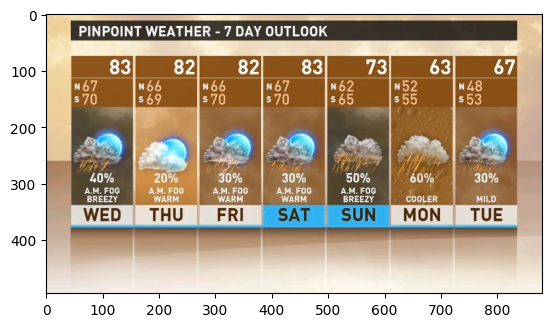

In [32]:
#show 3 image before processing
plt.imshow(new_background)

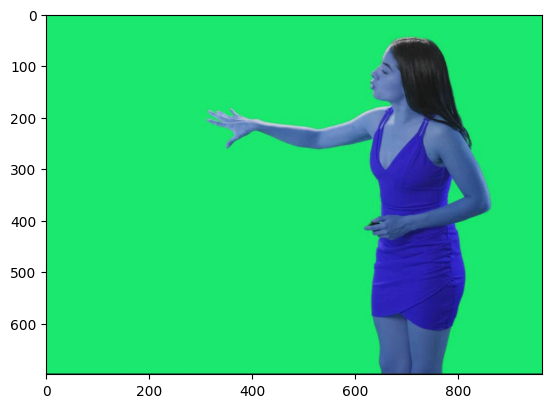

In [33]:
plt.imshow(object_img)

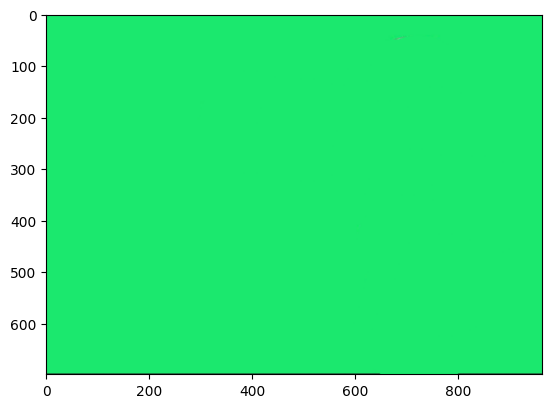

In [34]:
plt.imshow(background)

In [35]:
# Resize all images to same size  (640 , 480)
object_img = cv2.resize(object_img, (640, 480))
background = cv2.resize(background, (640, 480))
new_background = cv2.resize(new_background, (640, 480))

In [36]:
# convert from BGR to RGB
object_img = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
new_background = cv2.cvtColor(new_background, cv2.COLOR_BGR2RGB)

background: [[[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 [[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 [[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 ...

 [[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 [[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 [[ 51.  79.  32.]
  [ 50.  77.  31.]
  [ 50.  77.  31.]
  ...
  [ 52.  80.  33.]
  [ 52.  80.  33.]
  [ 51.  78.  32.]]]
object: [[[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

 [[110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]
  ...
  [110. 232.  27.]
  [110. 232.  27.]
  [110. 232.  27.]]

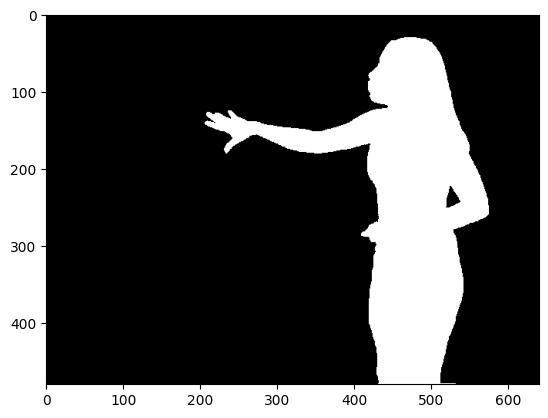

In [41]:
output_image = replace_background_image(background, object_img, new_background)

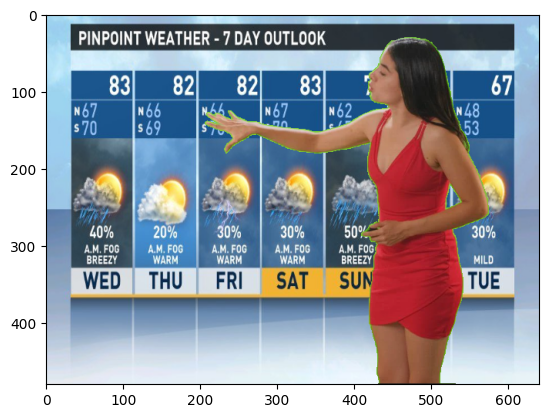

In [42]:
plt.imshow(output_image)

### **Exercise**

In [ ]:
#q1
import numpy as np
#stack 2 array axis = 1
#create 2 array 1D
arr1 = np.array([2,3,4])
arr2 = np.array([5,5,7])

stack_arr = np.stack((arr1, arr2), axis=1)
print(stack_arr)

[[2 5]
 [3 5]
 [4 7]]


In [ ]:
#q2
import numpy as np
#create 2 arr 2x2
arr1 = np.array([[1,2], [3,4]])
arr2 = np.array([[5,6], [7,8]])

#sum 2 matrix
print(arr1 + arr2)

[[ 6  8]
 [10 12]]


In [ ]:
#q3
import numpy as np
#create 2 arr 2x2
arr1 = [[1,2], [3,4]]
arr2 = [[5,6], [7,8]]

#sum 2 matrix
print(arr1 + arr2)

[[1, 2], [3, 4], [5, 6], [7, 8]]


In [ ]:
#q5
import numpy as np
#array 1D from 1 to 6
arr = np.arange(1,7)
result = np.where(arr >3, "A","B")
print(result)

['B' 'B' 'B' 'A' 'A' 'A']


In [ ]:
#q6
import numpy as np
import cv2

# load 2 image background and object iamge
#? 0
object_img = cv2.imread("object.png", 0)
background = cv2.imread("background1.png",0)

#resize images to (640,480)
object_img = cv2.resize(object_img, (640, 480))
background = cv2.resize(background, (640, 480))

#convert from BGR to RGB
object_img = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

difference_three_channel = np.abs(background - object_img)
print(difference_three_channel)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


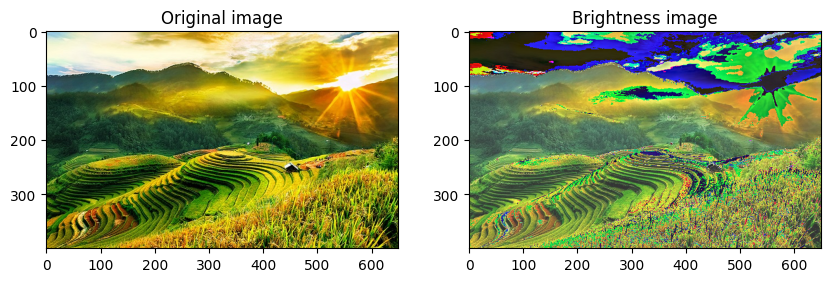

In [ ]:
#q7
import numpy as np
import cv2
import matplotlib.pyplot as plt

#read 1 image and convert to RGB
img = cv2.imread("nature.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# adjust the level light of image
new_image = img + 50
new_image = np.clip(new_image, 0, 255)
new_image = new_image.astype(np.uint8)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(img)
plt.title("Original image")

plt.subplot(122)
plt.imshow(new_image)
plt.title("Brightness image")
plt.show()

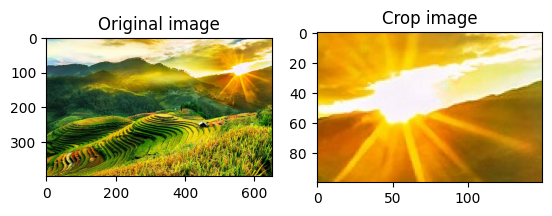

In [ ]:
#q8
import numpy as np
import cv2
import matplotlib.pyplot as plt

#read 1 image and convert to RGB
img = cv2.imread("nature.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#crop picture at img[50:150, 500:700]
cropped_image = img[50:150, 500:700]

plt.subplot(121)
plt.imshow(img)
plt.title("Original image")

plt.subplot(122)
plt.imshow(cropped_image)
plt.title("Crop image")
plt.show()

